1. Veri okuma

In [1]:
import pandas as pd

# Dengelenmiş eğitim setini oku
train_df = pd.read_csv("dataset/train_balanced.csv")

# Test setini oku
test_df = pd.read_csv("dataset/test_scaled.csv")

# Özellik ve etiket ayrımı
X_train = train_df.drop("Class", axis=1)
y_train = train_df["Class"]

X_test = test_df.drop("Class", axis=1)
y_test = test_df["Class"]

# Kontrol amaçlı boyutlara bakalım
print("Eğitim verisi şekli:", X_train.shape)
print("Test verisi şekli:", X_test.shape)

Eğitim verisi şekli: (398040, 30)
Test verisi şekli: (85443, 30)


2. Naive Bayes modeli ile eğitim

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Model oluştur
model = GaussianNB()

# Eğit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # ROC AUC için ihtiyacımız olacak

3. Naive Bayes model eğitimi ve değerlendirme

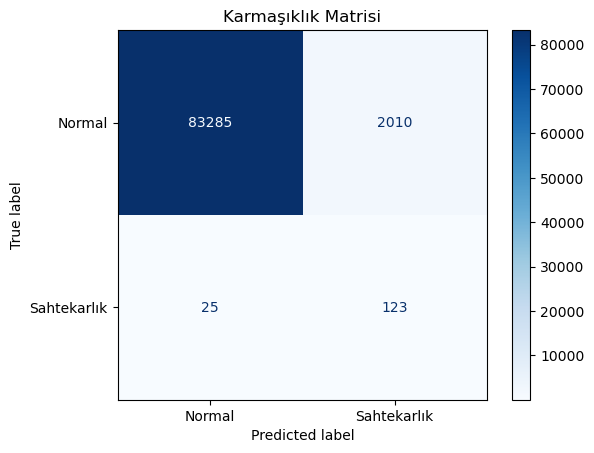

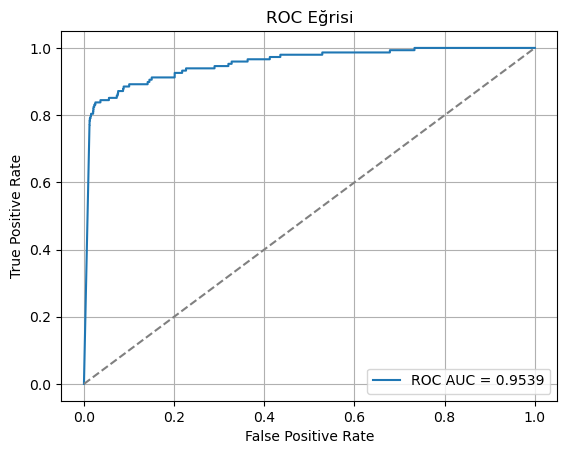

Doğruluk (Accuracy):     0.9762
Kesinlik (Precision):    0.0577
Duyarlılık (Recall):     0.8311
Özgüllük (Specificity):  0.9764
F1 Skoru:                0.1078
ROC AUC Skoru:           0.9539


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# 1️⃣ Tahminler ve olasılıklar
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Normal", "Sahtekarlık"]).plot(cmap='Blues')
plt.title("Karmaşıklık Matrisi")
plt.show()

# 3️⃣ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend()
plt.grid()
plt.show()

# 4️⃣ Detaylı Metrikler
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])  # TN / (TN + FP)

# 5️⃣ Hepsini yazdır
print(f"Doğruluk (Accuracy):     {accuracy:.4f}")
print(f"Kesinlik (Precision):    {precision:.4f}")
print(f"Duyarlılık (Recall):     {recall:.4f}")
print(f"Özgüllük (Specificity):  {specificity:.4f}")
print(f"F1 Skoru:                {f1:.4f}")
print(f"ROC AUC Skoru:           {roc_auc:.4f}")

## Naive Bayes Performans Özeti

| Metrik            | Değer     |
|-------------------|-----------|
| Doğruluk          | 0.9762    |
| Kesinlik          | 0.0577    |
| Duyarlılık        | 0.8311    |
| Özgüllük          | 0.9764    |
| F1 Skoru          | 0.1078    |
| ROC AUC Skoru     | 0.9539    |

- Naive Bayes modeli, sahtekârlıkları büyük oranda tespit edebilmiş (Recall yüksek).
- Ancak Precision düşüklüğü nedeniyle çok sayıda yanlış alarm üretmektedir.
- Genel model başarısı ROC AUC ile değerlendirildiğinde oldukça iyidir.